03_feature_engineering.ipynb

# 특성 공학 (Feature Engineering)

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('./perch.csv')
perch_data = df.to_numpy()
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(perch_data, perch_weight, random_state=42)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_, lr.intercept_)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3, 5]])
poly.transform([[2, 3, 5]])

[ 9.07538153 69.46401443 38.00385678] -599.1708082981095
0.9559326821885706
0.8796419177546367


array([[ 2.,  3.,  5.,  4.,  6., 10.,  9., 15., 25.]])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_data, perch_weight, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))


0.9559326821885706
0.8796419177546367


In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3,5]]) # 사이킷런에서는 fit이 의무라서 그런거지 크게 의미는 없다.
poly.transform([[2,3,5]])


# 계수(절편?)
## array([[1., 2., 3., 4., 6., 9.]])

array([[ 2.,  3.,  5.,  4.,  6., 10.,  9., 15., 25.]])

In [7]:
poly = PolynomialFeatures(include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test) # ???



# X_train_poly.shape
# 데이터 갯수 42, 컬럼 9개
## (42, 9)


In [8]:
lr_p = LinearRegression()
lr.fit(X_train_poly, y_train)
lr.coef_, lr.intercept_

print(lr.coef_,lr.intercept_)

[  34.80604039  -88.68430232 -184.11606694   -2.2696004     8.74890226
    9.41670602   27.76120631 -119.89306061   93.68198334] 124.065217722336


In [9]:
poly = PolynomialFeatures(degree=5, include_bias=False)
X_train_p5 = poly.fit_transform(X_train)
X_test_p5 = poly.fit_transform(X_test)
X_train_p5.shape

# 초 과대 적합(Overfitting) -> 훈련셋에는 완벽한데, 테스트는 망한
lr.fit(X_train_p5, y_train)
lr.score(X_train_p5, y_train)
lr.score(X_test_p5, y_test)

-144.4049046409093

# 규제 (Regularization)

과대 적합(Overfitting) 방지

- 릿지(ridge) 회귀 : 계수를 제곱한 값을 기준으로 규제
- 라쏘(lasso) 회귀 : 절댓값 기준으로 규제

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# 훈련셋으로 스케일링 학습
ss.fit(X_train_p5)

# 훈련 & 테스트 모두 훈련셋 기준으로 스케일링 진행
X_train_scaled = ss.transform(X_train_p5)
X_test_scaled = ss.transform(X_test_p5)

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10) # alpha계수가 학습 할 때 건드릴 수 있는거 하이퍼 파라미터
ridge.fit(X_train_scaled, y_train)
print(ridge.score(X_train_scaled,y_train))
print(ridge.score(X_test_scaled,y_test))




0.988728468997471
0.9725329582461568


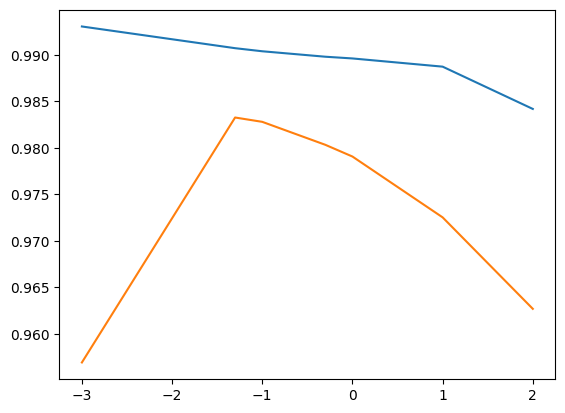

In [17]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001,0.001, 0.05, 0.1, 0.5, 1, 10, 100]

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    s1 = ridge.score(X_train_scaled, y_train)
    s2 = ridge.score(X_test_scaled, y_test)
    train_score.append(s1)
    test_score.append(s2)

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)

# 그래프상 -1이니깐 로그 10의 -1승이면 0.1


In [19]:
# alpha 값을 위에서 구해
ridge = Ridge(alpha=0.05)
ridge.fit(X_train_scaled, y_train)
s1 = ridge.score(X_train_scaled, y_train)
s2 = ridge.score(X_test_scaled, y_test)
print(s1, s2)



0.9907126320312711 0.9832630119139699


/Users/jaehyuntak/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/Users/jaehyuntak/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/Users/jaehyuntak/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

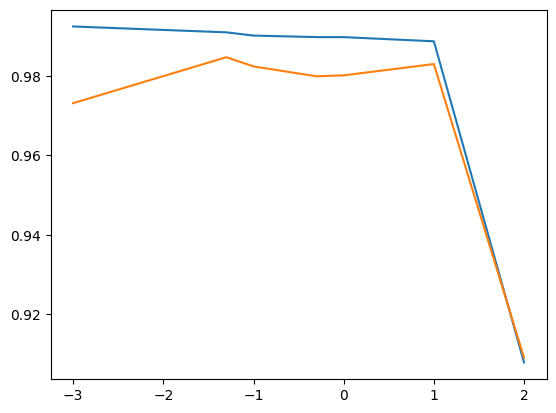

In [20]:
from sklearn.linear_model import Lasso

train_score = []
test_score = []

alpha_list = [0.001,0.001, 0.05, 0.1, 0.5, 1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    s1 = lasso.score(X_train_scaled, y_train)
    s2 = lasso.score(X_test_scaled, y_test)
    train_score.append(s1)
    test_score.append(s2)

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)

In [21]:
# alpha 값을 위에서 구해

lasso = Lasso(alpha=10, max_iter = 10000)
lasso.fit(X_train_scaled, y_train)

s1 = lasso.score(X_train_scaled, y_train)
s2 = lasso.score(X_test_scaled, y_test)
print(s1, s2)

X = poly.transform([[13.7, 3.53, 2]])
X = ss.transform(X)
lasso.predict(X)

0.9887624603020236 0.9830309645308442


array([31.53335736])